In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
from keras import backend as K
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
def RemoveFromList(thelist, val):
    return [value for value in thelist if value != val]

def GetDic():
    try:
        dicopen = open("drugs.txt", "r")
        dicraw = dicopen.read()
        dicopen.close()
        diclist = dicraw.split("\n")
        diclist = RemoveFromList(diclist, '')
        return diclist
    except FileNotFoundError:
        print("No Dictionary!")
        return 
    
def Word2Vect(word):
    l = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    v = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    w = word.lower()
    wl = list(w)
    for i in range(0, len(wl)):
        if wl[i] in l:
            ind = l.index(wl[i])
            v[ind] += 1
    return v

def Vect2Int(vect):
    pv = 0
    f = 0
    for i in range(0, len(vect)):
        wip = (vect[i]*(2**pv))
        f += wip
        pv += 4
    return f
    
def Ints2Dic(dic):
    d = {}
    for i in range(0, len(dic)):
        v = Word2Vect(dic[i])
        Int = Vect2Int(v)
        if Int in d:
            tat = d.get(Int)
            tat.append(dic[i])
            d[Int] = tat
        elif Int not in d:
            d[Int] = [dic[i]]
    return d
        
d = GetDic()
ind = Ints2Dic(d)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
import PIL
import numpy as np
import cv2 
import matplotlib.pyplot as plt

data_path = 'C:/Users/Ceyda Elcin Kaya/Desktop/final/dataset_2_full/dataset_2'
target_img = (28,28)
train_data_gen = ImageDataGenerator(rescale= 1./255,
                                   validation_split = 0.25)


validation_generator = train_data_gen.flow_from_directory(data_path,
                                                         color_mode = 'grayscale',
                                                         shuffle=False,
                                                         target_size = target_img,
                                                         batch_size = 6831,
                                                         class_mode = 'categorical',
                                                         subset='validation')

x_validation2, y_validation2 = validation_generator.next()

Found 1699 images belonging to 26 classes.


In [13]:
# Converting the pixels data to float type
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [14]:
# f(data)=label
X = data.drop('0',axis = 1,  index=None, columns=None, level=None, inplace=False, errors='raise')/255
y = data['0']

In [15]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


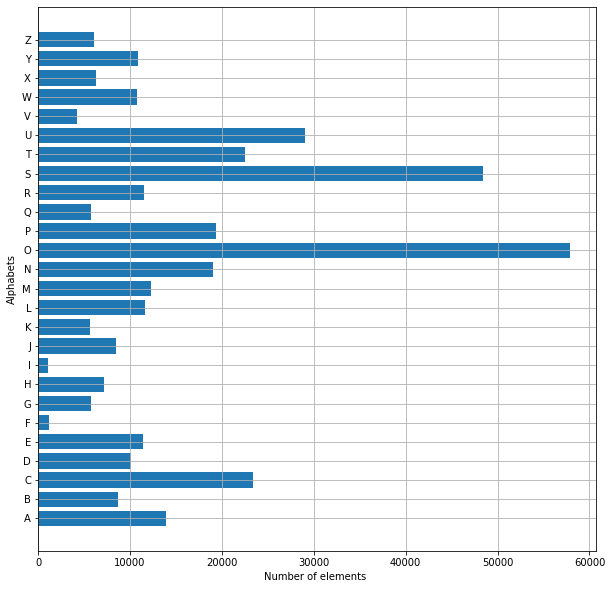

In [16]:
# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

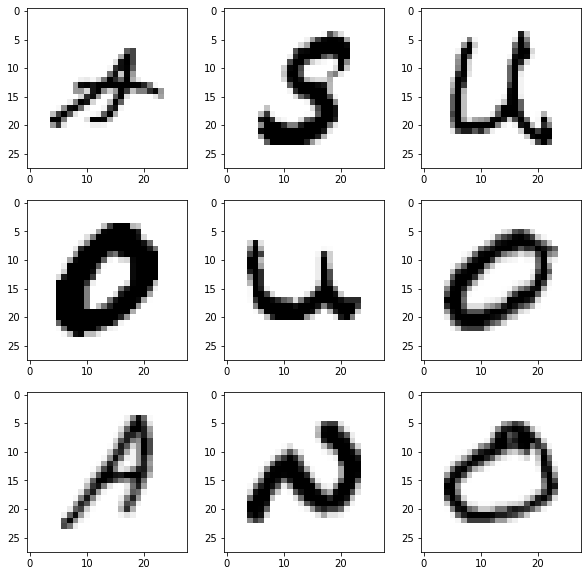

In [17]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [18]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [19]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)



New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [20]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))





model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [21]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history = model.fit(train_X, train_yOHE, epochs=5, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))


Epoch 1/5
9312/9312 [==============================] - 194s 21ms/step - loss: 0.1326 - accuracy: 0.9622 - val_loss: 0.0570 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 2/5
9312/9312 [==============================] - 190s 20ms/step - loss: 0.0539 - accuracy: 0.9849 - val_loss: 0.0452 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 3/5
9312/9312 [==============================] - 192s 21ms/step - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.0461 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 4/5
9312/9312 [==============================] - 192s 21ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0224 - val_accuracy: 0.9943 - lr: 2.0000e-04
Epoch 5/5
9312/9312 [==============================] - 192s 21ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0198 - val_accuracy: 0.9952 - lr: 2.0000e-04


In [19]:
print("\nTesting starts")
scores=model.evaluate(test_X,test_yOHE)             # Testing
print("Testing ends\n")
print("Testing Accuracy: ", scores[1])


Testing starts
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0330 - accuracy: 0.9955
Testing ends

Testing Accuracy:  0.9955430030822754


Text(0.5, 1.0, 'Loss Curves')

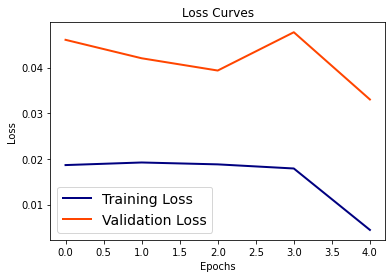

In [20]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'navy', linewidth=2.0)
plt.plot(history.history['val_loss'], 'orangered', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

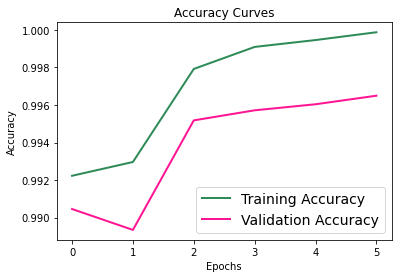

In [17]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'seagreen', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'deeppink', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [21]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9955430030822754
The training accuracy is : 0.998687744140625
The validation loss is : 0.03299950063228607
The training loss is : 0.004437364637851715


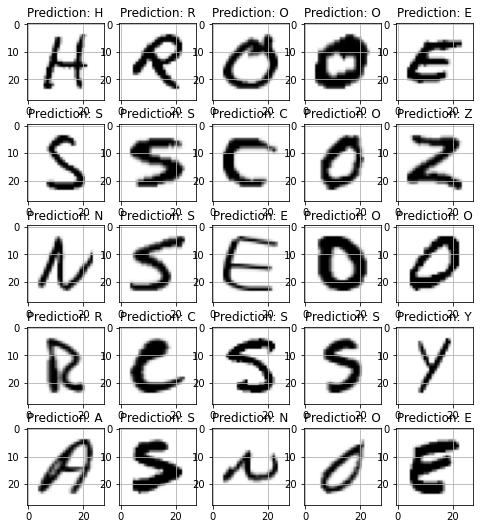

In [22]:
from random import randrange

s = test_X.shape[0]

fig, axes = plt.subplots(5,5, figsize=(8,9))
axes = axes.flatten()

letters = []
for i,ax in enumerate(axes):
    r=randrange(s)
    pred = np.argmax(model.predict(np.expand_dims(test_X[r],(0,3))))
    letters.append(word_dict[pred])
    img = np.reshape(test_X[r], (28,28))
    pred = word_dict[pred]
    ax.imshow(img, cmap="Greys")
    ax.set_title("Prediction: "+pred)
    ax.grid()


## CASE 2 - T1T2:
Training data is same, while validation is different.

In [48]:
K.clear_session()
tf.compat.v1.reset_default_graph()


In [58]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))





model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [59]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=0, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max')
#when patience is 1 it takes the final results which are worse than the previous
history = model.fit(train_X, train_yOHE, epochs=5,  callbacks=[early_stop, reduce_lr], validation_data = (x_validation2,y_validation2))


Epoch 1/5
9312/9312 [==============================] - 107s 11ms/step - loss: 0.1334 - accuracy: 0.9618 - val_loss: 1.9526 - val_accuracy: 0.6239 - lr: 0.0010
Epoch 2/5
9312/9312 [==============================] - 106s 11ms/step - loss: 0.0522 - accuracy: 0.9852 - val_loss: 2.0489 - val_accuracy: 0.6328 - lr: 0.0010
Epoch 3/5
9312/9312 [==============================] - 106s 11ms/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 2.4997 - val_accuracy: 0.6025 - lr: 2.0000e-04


Text(0.5, 1.0, 'Loss Curves')

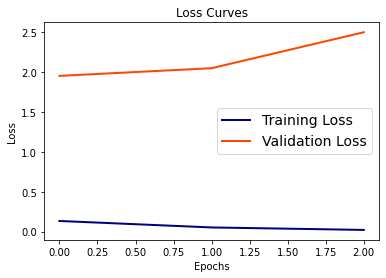

In [60]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'navy', linewidth=2.0)
plt.plot(history.history['val_loss'], 'orangered', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

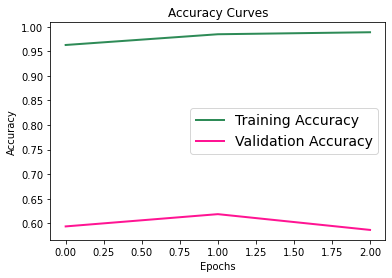

In [52]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'seagreen', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'deeppink', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [61]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.602495551109314
The training accuracy is : 0.9939824342727661
The validation loss is : 2.4996707439422607
The training loss is : 0.02124190144240856


['Y', 'V', 'U', 'H', 'N', 'N', 'E', 'S', 'P', 'L', 'W', 'R', 'A', 'E', 'I', 'F', 'T', 'J', 'T', 'D', 'V', 'S', 'T', 'T', 'T']


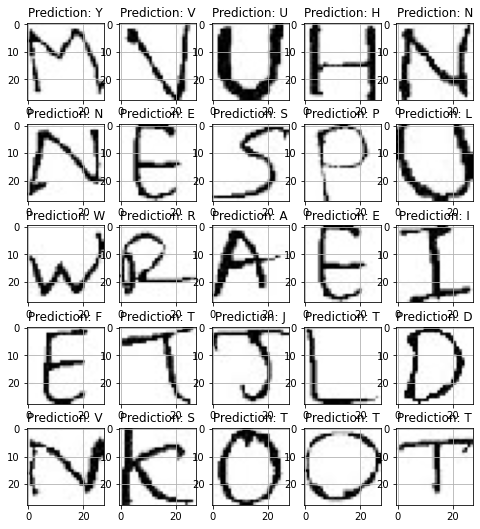

In [88]:
from random import randrange

s = x_validation2.shape[0]

# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(5,5, figsize=(8,9))
axes = axes.flatten()
letters=[]
for i,ax in enumerate(axes):
    r=randrange(s)
    pred = np.argmax(model.predict(np.expand_dims(x_validation2[r],(0,3))))
    letters.append(word_dict[pred])
    img = np.reshape(x_validation2[r], (28,28))
    pred = word_dict[pred]
    ax.imshow(img, cmap="Greys")
    ax.set_title("Prediction: "+pred)
    ax.grid()
print(letters)

In [46]:
import itertools
stuff = letters
for L in range(2, len(stuff)+1):                           #2 letter combinations upto 25 letter combinations
    print(str(L)+' letters combination:')
    meds = []#empty list
    for subset in itertools.combinations(stuff, L):        #return r length subsequences of elements from the input letters
        
        s= ("".join(list(subset)))
        v = Vect2Int(Word2Vect(s))
        tp = ind.get(v, 'not')
                
        if tp!='not':
            meds=meds+list(set(tp))
        
    print(list(set(meds)))
            
    #print('')

2 letters combination:
[]
3 letters combination:
['D.H.E. 45', 'E.E.S.-400']
4 letters combination:
['Urea', 'Apri']
5 letters combination:
['Revia', 'Intal', 'Aveed', 'Eylea', 'Advil', 'Afrin', 'Senna', 'Junel 1 / 20', 'Jalyn', 'Aleve']
6 letters combination:
['Deplin', 'Hydrea', 'Iressa', 'Unasyn', 'Viread', 'Fastin', 'Prialt', 'Pylera', 'Evista', 'Nardil', 'Retin-A', 'Dulera', 'Nplate', 'Sutent', 'Lutera', 'Duavee', 'Lysine', 'Vantin', 'Levsin', 'Naftin', 'Edluar', 'Veltin', 'Lantus', 'Hytrin', 'Alesse', 'Rydapt', 'Versed', 'Silver', 'Vienva', 'Septra']
7 letters combination:
['Larin Fe 1.5 / 30', 'Astelin', 'Nuvessa', 'Uptravi', 'Velivet', 'Vyvanse', 'Sustiva', 'Latisse', 'Desyrel', 'Denavir', 'Tenuate', 'Junel Fe 1 / 20', 'Enjuvia', 'Inderal', 'Lindane', 'Renvela', 'Synarel', 'Saphris', 'Junel Fe 1.5 / 30', 'Vestura', 'Junel Fe 24', 'Uristat', 'Larin Fe 1 / 20', 'Sansert', 'Systane', 'TriLyte', 'Urispas', 'Trental', 'Lysteda', 'Stendra', 'Relafen', 'Levitra', 'Lessina', 'Lunesta',